<a href="https://colab.research.google.com/github/AdityaDhiman05/UPI-Fraud-Detection-Project/blob/main/DAY_6_CAPSTONE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Today we will detect anomalies in UPI transaction growth patterns and analyze correlations among features. These steps are important for understanding which features are most predictive for future fraud detection modeling.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload dataset
uploaded = files.upload()
df = pd.read_csv("upi_cleaned.csv")

# Convert Month to datetime
df['Month'] = pd.to_datetime(df['Month'], errors='coerce')
df = df.sort_values('Month').reset_index(drop=True)

# Feature Engineering (if not already done)
df['Year'] = df['Month'].dt.year
df['Month_Num'] = df['Month'].dt.month
df['Quarter'] = df['Month'].dt.quarter

# Calculate MoM and YoY growth (if not already done)
df['MoM_Value_Growth'] = df['Value_Cr'].pct_change() * 100
df['MoM_Volume_Growth'] = df['Volume_Mn'].pct_change() * 100
df['YoY_Volume_Growth'] = df['Volume_Mn'].pct_change(12) * 100
df['YoY_Value_Growth'] = df['Value_Cr'].pct_change(12) * 100

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)


Saving upi_cleaned.csv to upi_cleaned.csv


We detect anomalies in MoM growth using a simple statistical rule: any value beyond mean ± 2 standard deviations is considered an anomaly.
df['Volume_Anomaly'] and df['Value_Anomaly'] are boolean columns marking anomalies.
We visualize them using a line plot and highlight anomalous points in red.

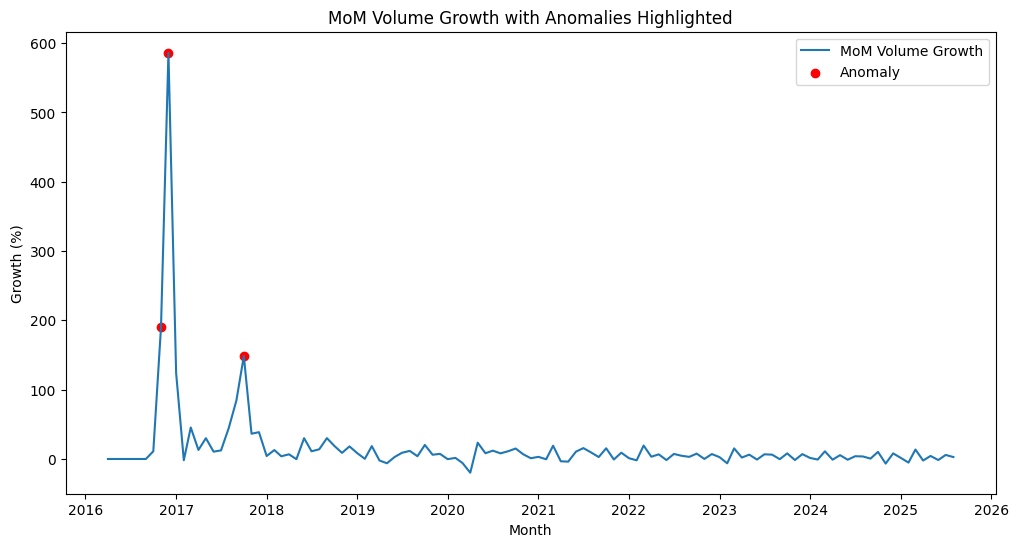

In [2]:
# Define anomalies as values beyond mean ± 2*std
volume_mean = df['MoM_Volume_Growth'].mean()
volume_std = df['MoM_Volume_Growth'].std()
value_mean = df['MoM_Value_Growth'].mean()
value_std = df['MoM_Value_Growth'].std()

df['Volume_Anomaly'] = ((df['MoM_Volume_Growth'] > volume_mean + 2*volume_std) |
                        (df['MoM_Volume_Growth'] < volume_mean - 2*volume_std))
df['Value_Anomaly'] = ((df['MoM_Value_Growth'] > value_mean + 2*value_std) |
                       (df['MoM_Value_Growth'] < value_mean - 2*value_std))

# Visualize anomalies
plt.figure(figsize=(12,6))
plt.plot(df['Month'], df['MoM_Volume_Growth'], label='MoM Volume Growth')
plt.scatter(df['Month'][df['Volume_Anomaly']], df['MoM_Volume_Growth'][df['Volume_Anomaly']],
            color='red', label='Anomaly')
plt.title("MoM Volume Growth with Anomalies Highlighted")
plt.xlabel("Month")
plt.ylabel("Growth (%)")
plt.legend()
plt.show()


Correlation analysis helps us understand how features relate to each other.
Features that are highly correlated may carry redundant information, while features with weak correlation to others might be independent predictors.
We use a heatmap to visualize correlations between numeric columns.

---



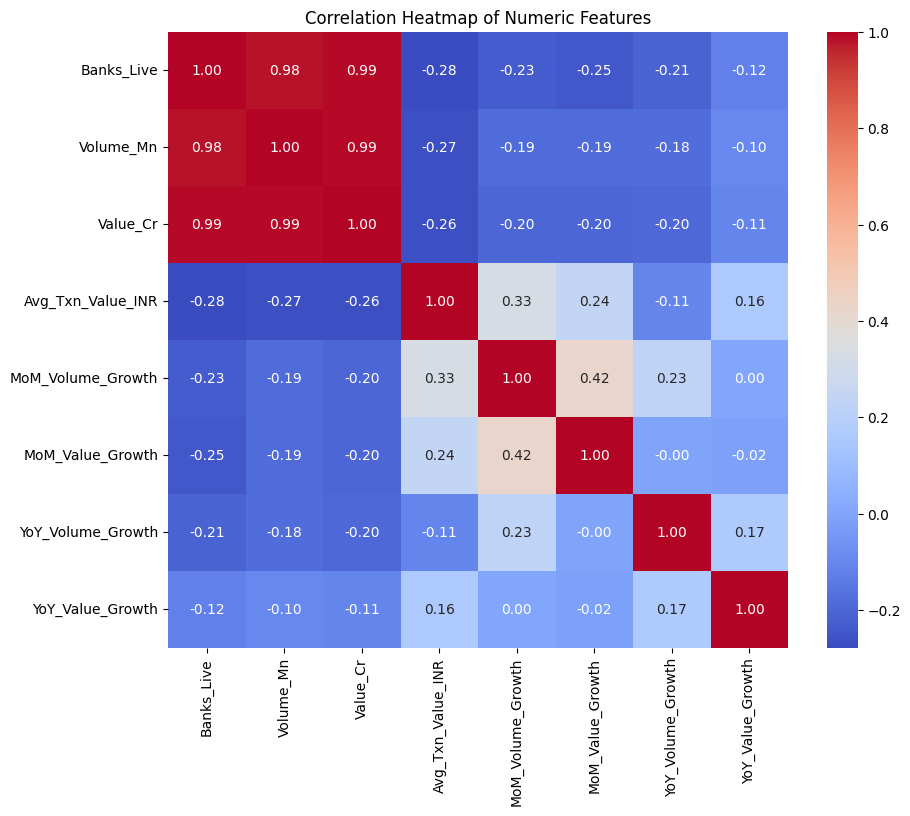

In [3]:
# Select numeric columns for correlation
numeric_cols = ['Banks_Live','Volume_Mn','Value_Cr','Avg_Txn_Value_INR',
                'MoM_Volume_Growth','MoM_Value_Growth','YoY_Volume_Growth','YoY_Value_Growth']

corr_matrix = df[numeric_cols].corr()

# Visualize correlations with heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


Based on correlation analysis and domain knowledge, we select features that are likely predictive for future modeling (fraud detection).
This subset (df_model) will be used in upcoming machine learning models.

In [4]:
# For modeling, we may drop highly correlated or irrelevant columns
# Example: keep key predictive features
selected_features = ['Banks_Live', 'Volume_Mn', 'Value_Cr', 'Avg_Txn_Value_INR',
                     'MoM_Volume_Growth', 'MoM_Value_Growth', 'YoY_Volume_Growth', 'YoY_Value_Growth']

df_model = df[selected_features]
df_model.head()


,Banks_Live,Volume_Mn,Value_Cr,Avg_Txn_Value_INR,MoM_Volume_Growth,MoM_Value_Growth,YoY_Volume_Growth,YoY_Value_Growth
0,21,0.00,0.00,0.000000,0.0,0.000000,0.0,0.0
1,21,0.00,0.00,0.000000,0.0,0.000000,0.0,0.0
2,21,0.00,0.00,0.000000,0.0,0.000000,0.0,0.0
3,21,0.09,0.38,42.222222,0.0,0.000000,0.0,0.0
4,21,0.09,3.09,343.333333,0.0,713.157895,0.0,0.0
